# Test of the Viterbi algorithm 

test of the Viterbi algorithm implemented in the `hidden_Markov` module

Pierre H - July 2015

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools

In [2]:
%matplotlib inline

In [3]:
import hidden_Markov as hM

In [4]:
reload(hM)

<module 'hidden_Markov' from 'hidden_Markov.pyc'>

## Create the Hidden Markov model

### Markov chain dynamics

In [5]:
T = np.array([
    [0.97, 0.03],
    [0.10, 0.90]
])
mc = hM.MarkovChain(T, ['-', 'P'])
print(mc.states)

['-', 'P']


### Observation laws

In [6]:
std = 0.5
obs_laws = {
    '-':stats.norm(0, std),
    'P':stats.norm(1, std),
}
hm = hM.HiddenMarkov(mc, obs_laws)
hm

## Generate & estimate

Generate a sequence of observation and estimate the state

In [7]:
rng = np.random.RandomState(0)
n_pts = 100

obs_gen = hm.gen(mc_rng=rng, obs_seed=0, with_state=True)
state_obs_seq = [o for o in itertools.islice(obs_gen, n_pts)]
state_obs_seq = np.array(state_obs_seq)
s,o = state_obs_seq.T

In [8]:
# Viterbi estimation:
s_seq_estim, max_ll, argmax = hm.state_estim(o)

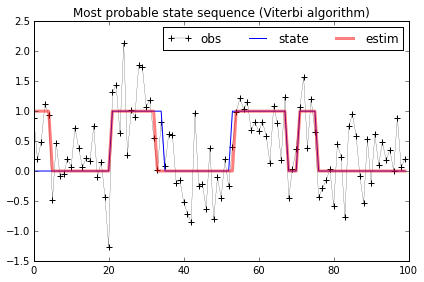

In [9]:
# Plot
def plot_state_estim(obs, state, state_estim):
    plt.plot(obs, 'k+-', lw=0.2, mew=1., label='obs')
    plt.plot(state, 'b', label='state')
    plt.plot(state_estim, 'r', label='estim', lw=3, alpha=0.5)

    plt.legend(loc='upper right', ncol=3)
    plt.title('Most probable state sequence (Viterbi algorithm)')
    plt.tight_layout()

plot_state_estim(o, s, s_seq_estim)

difference of log-likelyhood between the two states

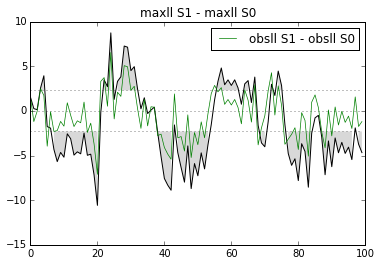

In [10]:
k = np.arange(max_ll.shape[1])
max_ll_1_diff = max_ll[1,:]-max_ll[0,:]
plt.plot(k,max_ll_1_diff, color='k')

plt.plot(obs_laws['P'].logpdf(o) - obs_laws['-'].logpdf(o), 'g',
         label='obsll S1 - obsll S0', lw=0.7)

# Likelihood thresholds:
ll_thres = np.log(10)
plt.hlines([0,ll_thres, -ll_thres], 0, k[-1],
           linestyles='dotted', color='gray')
plt.fill_between(k, max_ll_1_diff,ll_thres, where=max_ll_1_diff>ll_thres,
                 lw=0, alpha=0.3, color='gray')
plt.fill_between(k, -ll_thres, max_ll_1_diff, where=max_ll_1_diff<-ll_thres,
                 lw=0, alpha=0.3, color='gray')

plt.title('maxll S1 - maxll S0');
plt.legend();

Backtracking of the most probable state

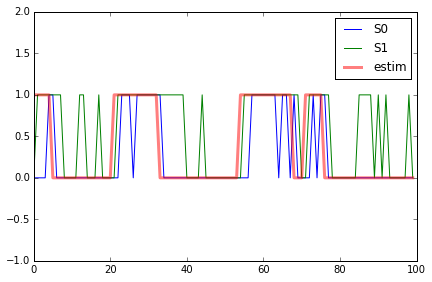

In [12]:
plt.plot(argmax[0,:], label='S0')
plt.plot(argmax[1,:], label='S1')


plt.plot(s_seq_estim, 'r', label='estim', lw=3, alpha=0.5)
plt.legend()

plt.tight_layout()
plt.ylim(-1,2);

## Interactive plots

In [13]:
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


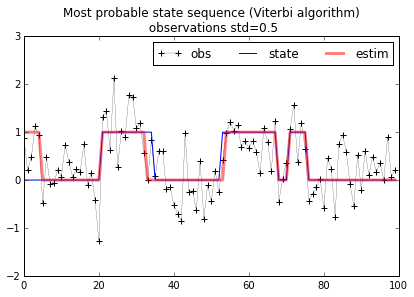

In [14]:
def p(obs_std=0.5, state_seed=0, obs_seed=0):
    obs_laws = {
        '-':stats.norm(0, obs_std),
        'P':stats.norm(1, obs_std),
    }
    hm = hM.HiddenMarkov(mc, obs_laws)
    
    rng = np.random.RandomState(state_seed)
    obs_gen = hm.gen(mc_rng=rng, obs_seed=obs_seed, with_state=True)
    state_obs_seq = [o for o in itertools.islice(obs_gen, 100)]
    state_obs_seq = np.array(state_obs_seq)
    s,o = state_obs_seq.T

    # Viterbi estimation:
    s_seq_estim, max_ll, argmax = hm.state_estim(o)
    
    plot_state_estim(o, s, s_seq_estim)
    plt.title(plt.gca().get_title()+'\n observations std={:.1f}'.format(obs_std))
    plt.ylim(-2, 3)

    
interact(p, obs_std=[0., 1.5], state_seed=[0,10], obs_seed=[0,10]);

## Accuracy of state estimation

TODO: study the accuracy of the state estimation, as a function of observation std.